In [12]:
#import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline

In [2]:
#load the raw csv files
df_arabica=pd.read_csv('arabica_ratings_raw.csv',index_col=[0])
df_robusta=pd.read_csv('robusta_ratings_raw.csv',index_col=[0])

In [3]:
#lets see the top 5 rows of the dataset
df_arabica.head()

,quality_score,view_certificate_1,view_certificate_2,Cupping Protocol and Descriptors,View Green Analysis Details,Request a Sample,Species,Owner,Country of Origin,Farm Name,...,Quakers,Color,Category Two Defects,NA.3,Expiration,Certification Body,Certification Address,Certification Contact,Unnamed: 51,Notes
0,90.58,NaN,NaN,NaN,NaN,NaN,Arabica,metad plc,Ethiopia,METAD PLC,...,0.0,Green,0 full defects,NaN,"April 3rd, 2016",METAD Agricultural Development plc,"BAWA Center, 3rd Floor (Gerji), Addis Ababa, E...","Aman Adinew (Emebet Dinku) - +251-116-292534, ...",NaN,NaN
1,89.92,NaN,NaN,NaN,NaN,NaN,Arabica,metad plc,Ethiopia,METAD PLC,...,0.0,Green,1 full defects,NaN,"April 3rd, 2016",METAD Agricultural Development plc,"BAWA Center, 3rd Floor (Gerji), Addis Ababa, E...","Aman Adinew (Emebet Dinku) - +251-116-292534, ...",NaN,NaN
2,89.75,NaN,NaN,NaN,NaN,NaN,Arabica,Grounds for Health Admin,Guatemala,"San Marcos Barrancas ""San Cristobal Cuch",...,0.0,NaN,0 full defects,NaN,"May 31st, 2011",Specialty Coffee Association,"117 W 4th St, Suite 300 Santa Ana, CA 92701",Chris Buck - (562) 624-4100,NaN,NaN
3,89.00,NaN,NaN,NaN,NaN,NaN,Arabica,Yidnekachew Dabessa,Ethiopia,Yidnekachew Dabessa Coffee Plantation,...,0.0,Green,2 full defects,NaN,"March 25th, 2016",METAD Agricultural Development plc,"BAWA Center, 3rd Floor (Gerji), Addis Ababa, E...","Aman Adinew (Emebet Dinku) - +251-116-292534, ...",NaN,NaN
4,88.83,NaN,NaN,NaN,NaN,NaN,Arabica,metad plc,Ethiopia,METAD PLC,...,0.0,Green,2 full defects,NaN,"April 3rd, 2016",METAD Agricultural Development plc,"BAWA Center, 3rd Floor (Gerji), Addis Ababa, E...","Aman Adinew (Emebet Dinku) - +251-116-292534, ...",NaN,NaN


### Well it looks pretty messy and a lot of cleaning has to be done. We can see many null values in few columns

In [7]:
print(df_arabica.shape,df_robusta.shape)

(1312, 52) (28, 50)


### There are 1312 records in Arabica dataset and 28 records in Robusta.We can see that it is a highly imbalanced dataset. Let's first deal with missing values

In [5]:
df_arabica.isnull().sum()

quality_score                          0
view_certificate_1                  1312
view_certificate_2                  1312
Cupping Protocol and Descriptors    1312
View Green Analysis Details         1312
Request a Sample                    1312
Species                                0
Owner                                  7
Country of Origin                      1
Farm Name                            356
Lot Number                          1042
Mill                                 307
ICO Number                           146
Company                              210
Altitude                             218
Region                                56
Producer                             230
Number of Bags                         0
Bag Weight                             0
In-Country Partner                     0
Harvest Year                          47
Grading Date                           0
Owner.1                                7
Variety                              202
Status          

### We can remove the columns view_certificate_1,view_certificate_2,Cupping Protocol and Descriptors,View Green Analysis Details,Lot Number,NA.2, NA.3, Unnamed: 51 and Notes columns first as there are many null values       

In [16]:
df_arabica.drop(['view_certificate_1','view_certificate_2','Cupping Protocol and Descriptors','View Green Analysis Details'
                ,'Request a Sample','NA.2','NA.3','Unnamed: 51','Notes'],axis = 1, inplace = True)

<AxesSubplot:>

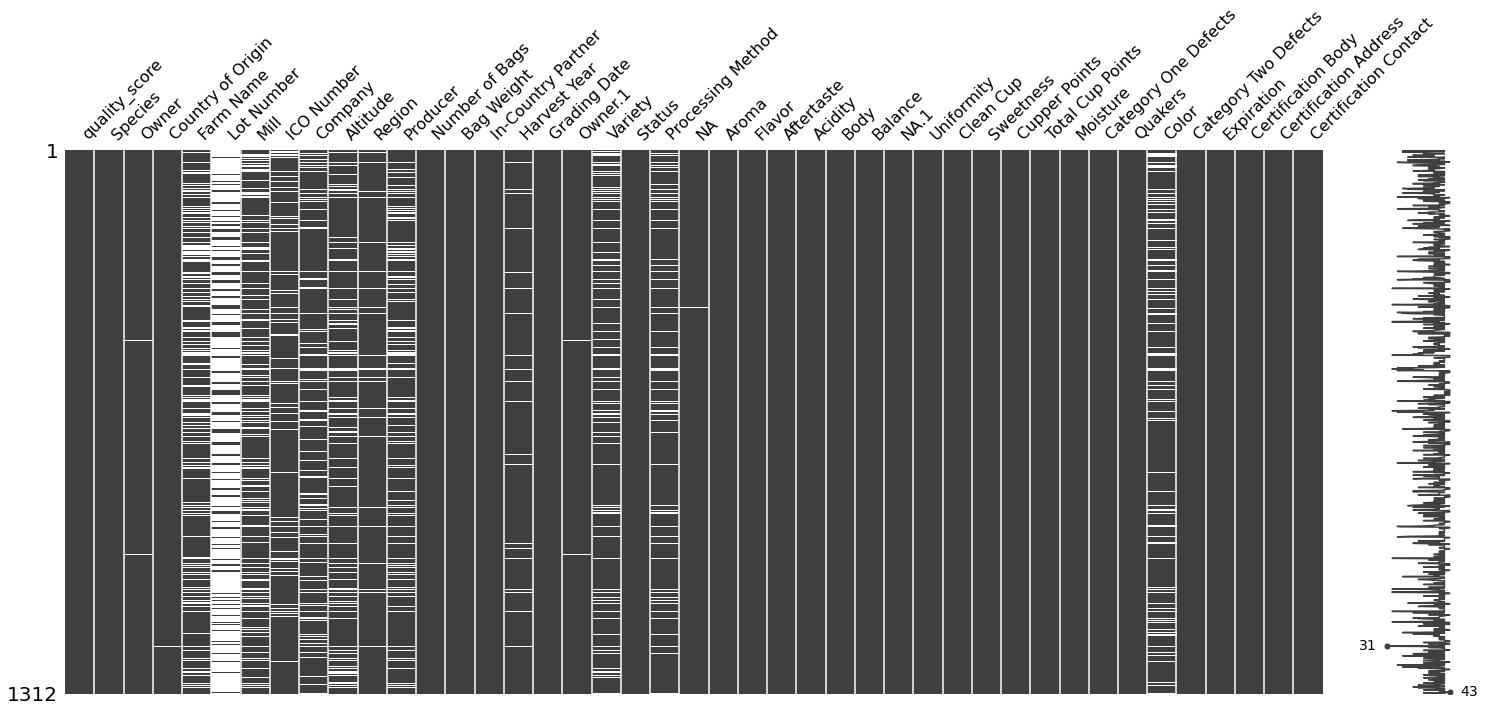

In [18]:
#Visualise the remaining columns in arabica dataset.
msno.matrix(df_arabica)

### We can see that Lot Number still has a lot of missing values.So let's remove it. 

In [19]:
#Drop the Lot Number from arabica dataset
df_arabica.drop(['Lot Number'],axis=1,inplace=True)

In [26]:
#explore NA and NA.1 columns as we have to give a proper name and also check its contents
print(df_arabica.NA.value_counts())
print(df_arabica['NA.1'].value_counts())

Sample    1310
Name: NA, dtype: int64
Sample    1312
Name: NA.1, dtype: int64


### We can safely remove these columns as they don't add value to our dataset

In [27]:
#drop the NA and NA.1 columns from the dataset
df_arabica.drop(['NA','NA.1'],axis=1,inplace=True)

### I am assuming Expiration,Certification Body,Certification Address,Certification Contact don't add value to our classifcation or clustering model in our furter steps as they don't go with our problem setting of coffee selection

In [33]:
#drop the Expiration,Certification Body,Certification Address,Certification Contact columns from arabica dataset
df_arabica.drop(['Expiration','Certification Body','Certification Address','Certification Contact'],axis=1,inplace=True)

In [42]:
#check owner and owner.1 columns to remove duplicates
print(df_arabica['Owner'].value_counts())
print('----------------------------------------------------')
print(df_arabica['Owner.1'].value_counts())

Juan Luis Alvarado Romero                             155
Racafe & Cia S.C.A                                     60
Exportadora de Cafe Condor S.A                         54
Kona Pacific Farmers Cooperative                       52
Ipanema Coffees                                        50
                                                     ... 
Amkeni Gourmet Coffee Group                             1
Coffee Export                                           1
U Soe                                                   1
PRODUCTORES DE ESPECIALIDAD EMILIANO ZAPEATA, SPR.      1
GUSTAVO ABARCA SOLIS                                    1
Name: Owner, Length: 307, dtype: int64
----------------------------------------------------
Juan Luis Alvarado Romero                             155
Racafe & Cia S.C.A                                     60
Exportadora de Cafe Condor S.A                         54
Kona Pacific Farmers Cooperative                       52
Ipanema Coffees                       

In [44]:
#Remove owner.1 column from the arabica dataset
df_arabica.drop(['Owner.1'],axis=1,inplace=True)

### Going with these many features is not a good idea for building a classification model but I don't want to remove columns based only on my intuition. I would like to perform few statistical tests to understand and select the best features

In [46]:
df_arabica.isnull().sum()

quality_score             0
Species                   0
Owner                     7
Country of Origin         1
Farm Name               356
Mill                    307
ICO Number              146
Company                 210
Altitude                218
Region                   56
Producer                230
Number of Bags            0
Bag Weight                0
In-Country Partner        0
Harvest Year             47
Grading Date              0
Variety                 202
Status                    0
Processing Method       153
Aroma                     0
Flavor                    0
Aftertaste                0
Acidity                   0
Body                      0
Balance                   0
Uniformity                0
Clean Cup                 0
Sweetness                 0
Cupper Points             0
Total Cup Points          0
Moisture                  0
Category One Defects      0
Quakers                   1
Color                   217
Category Two Defects      0
dtype: int64

In [47]:
df_arabica['Category One Defects'].value_counts()

0 full defects     1112
1 full defects      101
2 full defects       38
3 full defects       18
4 full defects       16
5 full defects        9
10 full defects       4
6 full defects        3
7 full defects        3
31 full defects       2
9 full defects        1
8 full defects        1
12 full defects       1
11 full defects       1
15 full defects       1
23 full defects       1
Name: Category One Defects, dtype: int64

In [38]:
for i in df_arabica.columns:
    print(i)
    print(df_arabica[i].value_counts())

quality_score
83.17    38
83.00    37
82.42    31
82.33    29
82.75    29
         ..
73.67     1
72.33     1
86.83     1
89.00     1
89.75     1
Name: quality_score, Length: 179, dtype: int64
Species
Arabica    1312
Name: Species, dtype: int64
Owner
Juan Luis Alvarado Romero                             155
Racafe & Cia S.C.A                                     60
Exportadora de Cafe Condor S.A                         54
Kona Pacific Farmers Cooperative                       52
Ipanema Coffees                                        50
                                                     ... 
Amkeni Gourmet Coffee Group                             1
Coffee Export                                           1
U Soe                                                   1
PRODUCTORES DE ESPECIALIDAD EMILIANO ZAPEATA, SPR.      1
GUSTAVO ABARCA SOLIS                                    1
Name: Owner, Length: 307, dtype: int64
Country of Origin
Mexico                          236
Colombia          

<AxesSubplot:>

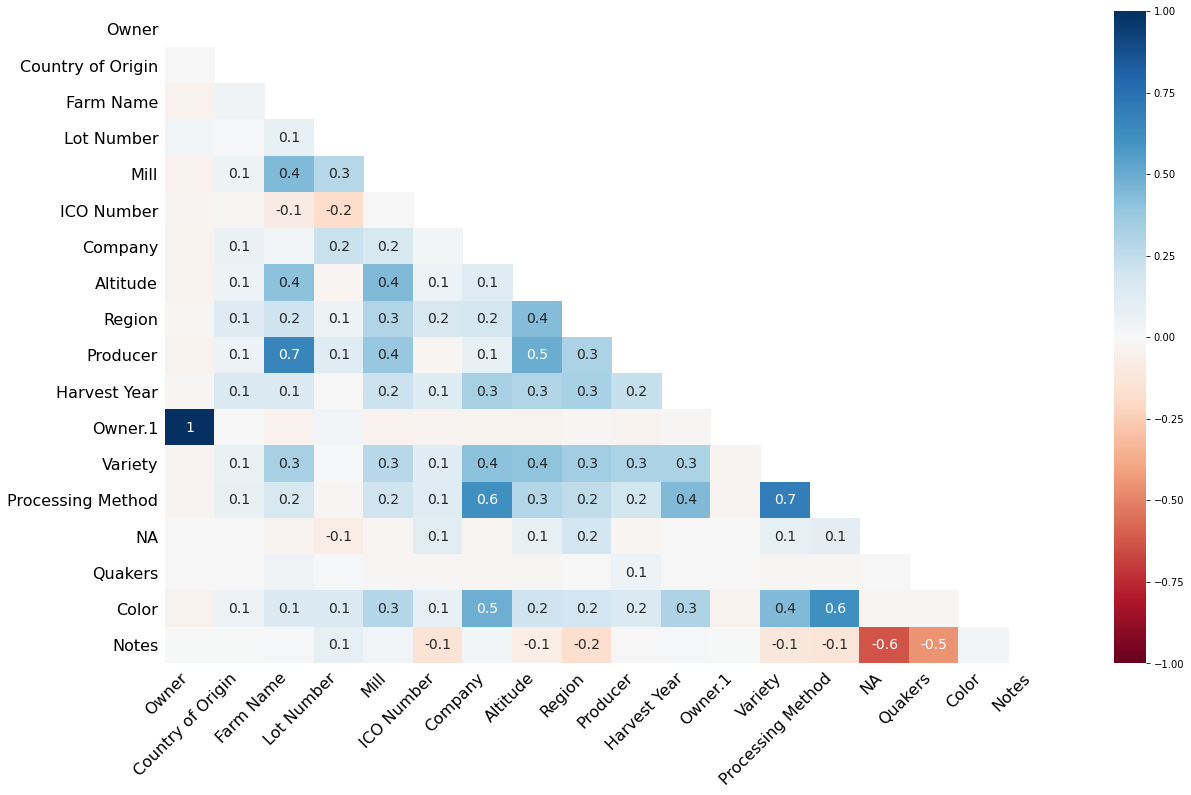

In [14]:
msno.heatmap(df_arabica)

In [8]:
df_robusta.isnull().sum()

quality_score                        0
view_certificate_1                  28
view_certificate_2                  28
Cupping Protocol and Descriptors    28
View Green Analysis Details         28
Request a Sample                    28
Species                              0
Owner                                0
Country of Origin                    0
Farm Name                            3
Lot Number                          22
Mill                                 8
ICO Number                          11
Company                              0
Altitude                             3
Region                               2
Producer                             2
Number of Bags                       0
Bag Weight                           0
In-Country Partner                   0
Harvest Year                         0
Grading Date                         0
Owner.1                              0
Variety                             25
Status                               0
Processing Method        